# 画像の用意

## 画像を読み込む

In [2]:
import numpy as np
import scipy.misc
from scipy.fftpack import dct, idct
import sys
from PIL import Image
import matplotlib.pyplot as plt
import random
from tqdm import tqdm_notebook as tqdm
from scipy.fftpack import dct, idct
%matplotlib inline

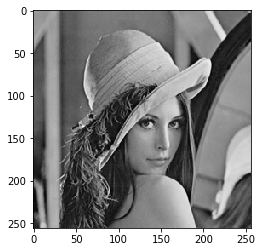

In [3]:
bmp = Image.open("LENNA.bmp")
plt.imshow(bmp,"gray")

## ランダムに8点を取得

### 画像サイズ

In [7]:
lenna_bmp = np.array(bmp)
lenna_bmp.shape

(256, 256)

### ランダムに取得

In [10]:
Row = random.randint(0,len(lenna_bmp)-8)
Col = random.randint(0,len(lenna_bmp))
ret = lenna_bmp[Row:Row+8,Col]

In [11]:
ret

array([50, 46, 46, 49, 53, 49, 54, 54], dtype=uint8)

## クラス

In [4]:
class ImageLoader:
    def __init__(self,FILE_PATH):
            self.img = np.array(Image.open(FILE_PATH))
            
    def get_points(self,POINT):
        Row = random.randint(0,len(self.img)-POINT-1)
        Col = random.randint(0,len(self.img)-1)
        return self.img[Row:Row+POINT,Col]

# FFT

/home/hiroya/Documents/Jupyter-Notebook/.venv/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


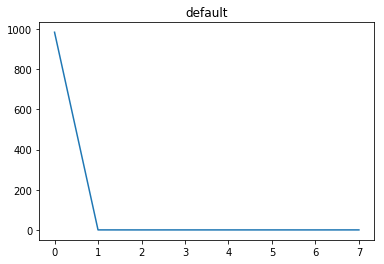

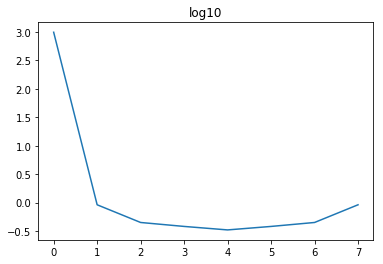

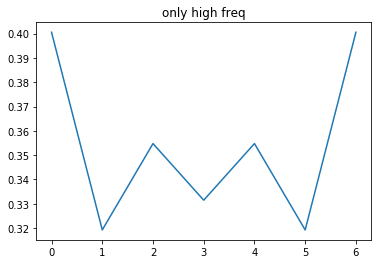

In [8]:
lenna = ImageLoader("LENNA.bmp")
LOOP_COUNT = 1000000
img_F = np.zeros(8).astype(np.complex128)

for i in tqdm(range(LOOP_COUNT)):
    img_F += np.fft.fft(lenna.get_points(8))
    
img_F /= LOOP_COUNT

plt.figure()
plt.title("default")
plt.plot(img_F)

plt.figure()
plt.title("log10")
plt.plot(np.log10(img_F))

plt.figure()
plt.title("only high freq")
plt.plot(img_F[1:])

# DCT

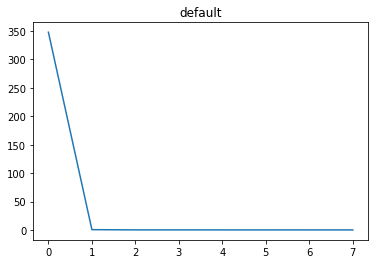

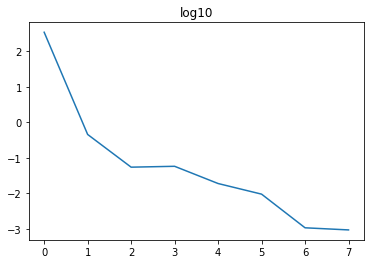

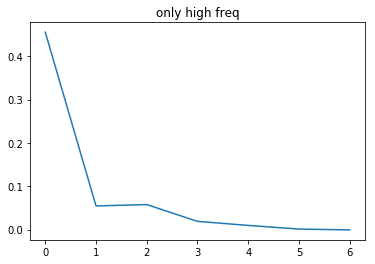

In [16]:
lenna = ImageLoader("LENNA.bmp")
LOOP_COUNT = 1000000
img_F = np.zeros(8).astype(np.complex128)

for i in tqdm(range(LOOP_COUNT)):
    img_F += dct(lenna.get_points(8),norm="ortho")
    
img_F /= LOOP_COUNT

plt.figure()
plt.title("default")
plt.plot(img_F)

plt.figure()
plt.title("log10")
plt.plot(np.log10(img_F))

plt.figure()
plt.title("only high freq")
plt.plot(img_F[1:])

# ランチョス

In [12]:
# ランチョスしたのを返す
def Lanczos(data):
    points = len(data)
    left = int(data[0])
    right = int(data[len(data)-1])
    
    result = np.zeros(points)
    for i in range(points):
        result[i] = data[i] - ((right-left)*i/(points-1) + left)

    return result

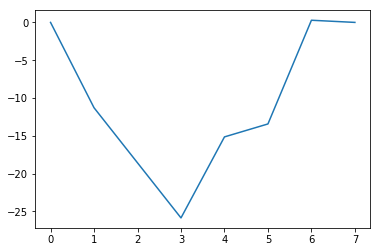

In [13]:
plt.plot(Lanczos(lenna.get_points(8)))

# ランチョスしてFFT

/home/hiroya/Documents/Jupyter-Notebook/.venv/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


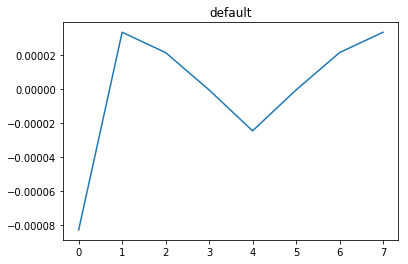

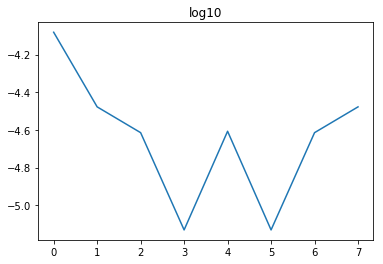

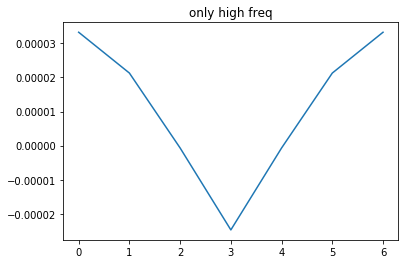

In [31]:
lenna = ImageLoader("LENNA.bmp")
LOOP_COUNT = 1000000
img_F = np.zeros(8).astype(np.complex128)

for i in tqdm(range(LOOP_COUNT)):
    points = lenna.get_points(8)
    points = Lanczos(points)
    img_F = np.fft.fft(points)
    
img_F /= LOOP_COUNT

plt.figure()
plt.title("default")
plt.plot(img_F)

plt.figure()
plt.title("log10")
plt.plot(np.log10(img_F))

plt.figure()
plt.title("only high freq")
plt.plot(img_F[1:])

/home/hiroya/Documents/Jupyter-Notebook/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log10


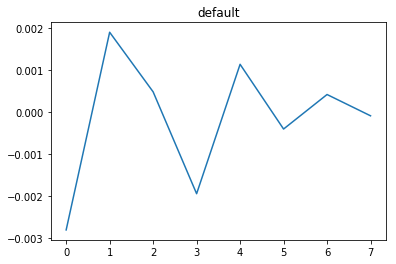

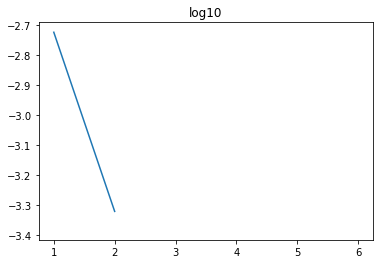

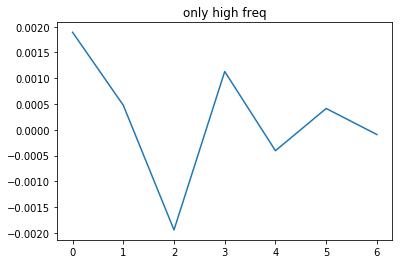

In [17]:
lenna = ImageLoader("LENNA.bmp")
LOOP_COUNT = 10000
img_F = np.zeros(8).astype(np.complex128)

for i in tqdm(range(LOOP_COUNT)):
    points = lenna.get_points(8)
    points = Lanczos(points)
    img_F = dct(points)
    
img_F /= LOOP_COUNT

plt.figure()
plt.title("default")
plt.plot(img_F)

plt.figure()
plt.title("log10")
plt.plot(np.log10(img_F))

plt.figure()
plt.title("only high freq")
plt.plot(img_F[1:])